# DSCI 573 lab 1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# classifiers / models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
%matplotlib inline

# data
from sklearn import datasets

# other
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

## General lab instructions
rubric={mechanics:2}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/)

## Exercise 0
rubric={reasoning:10}

Answer the following questions:

2. Why would it be a mistake to set the depth of a decision tree based purely on training accuracy?
1. What is the difference between the following two approaches?
  1. using 50% of your training data as a validation set (and the other 50% for training).
  2. 2-fold cross validation
3. Assuming $n$ is the number of training examples, what is the difference between leave-one-out cross-validation and $n$-fold cross-validation?
4. What is an advantage and a disadvantage of 10-fold cross-validation over 3-fold cross validation?
5. You have a (fictional) model that trains in $\mathcal{O}(n^2d)$ time (total) and makes predictions in $\mathcal{O}(d^2)$ time (per example). What is the time complexity of evaluating this model with $k$-fold cross-validation? Answer using big-O notation and explain or show your work. Your answer may depend on $n$, $d$, and/or $k$.
6. Explain the difference between parameters and hyperparameters. Which ones would we tend to tune with cross-validation? Why wouldn't cross validation be appropriate in the other case?

#### Answer

1.This would be a mistake. If we picked the depth of a decision tree based on training accuracy, we will overfit our model to the training data and reduce the predictive quality of the model on test data. We will likely choose a tree depth that is too large and create model an overfit model with high variance and low bias.    




2.When using 50% of your training data as validation set and the other 50% as training data, we will have one and only one training error (based on perfomance on the training half) and one and only one validation error (based on performance on validation half). However, when using 2-fold cross validation, we use each 50% of the data as a training set once and as a validation set once. Therefore, our training error will be the averaged training error across the two training sets, while our validation error is the averaged validation error across the two validation sets. In cross-validation all observations have been used for validation while otherwise only 50% have been used for validation.   


3.There is no difference   


4.*Advantage:* the validation error in 10-fold cross-validation allows us to train a higher number of models on larger parts of the training data. This means, that the models we generate have a lower bias and will likely achieve better validation-scores. However, as usual, this omes at the expense of an increased variance of the generated models.  

  
*Disadvantage:* Aside from the increased variance of 10-fold cross-validation, this method is computationally more expensive. This is, because we are training 10 models on 90% of the data and validate 10 times on 10% of the data. In 3-fold cross-validation on the other hand, we train 3 models on 66.66% of the data and validate 3 times on 33.33% of the data. 


5.
* training: 

With each fold $k$ we are training the model on the training-training data set with size $\frac{n(k-1)}{k}$. Therefore, we can replace $n$ in general notation with  $\frac{n(k-1)}{k}$ and multiply by the number of times we train our model $k$. This leads to a training-complexity of $O(k(\frac{(k-1)n}{k})^2d)$

* prediciton: 

Since use every observation in our data set of size $n$ one time for validation, we will have to do the prediction step n times. This leads to a prediciton-complexity of $\mathcal{O(nd^2)}$

6.Hyperparameters on the one hand, are set by us and determine the complexity of the model - by minimizing the cross-validation error we can attempt to find optimal hyperparameters. Parameters on the other hand, are determined by the algorithm in the training phase.  Using linear regression as an example, the hyperparameter is the amount of parameters in the model, while the parameters (intercept and slope(s)) are determined by minimizing squared errors.  


## Exercise 1
rubric={reasoning:4}

Many statistics exist that we can use to assess how good a model is. Fill in the following table of model statistics:

| Performance metric | Definition | When does it apply? 
|--------------------|---------------|------|
|  AIC               | Penalizing an increasing number of predictors. <br>From wikipedia: Formula $\frac{1}{n\sigma^2}(RSS+2d\sigma^2)$            | when the model is fit using maximum likelihood estimation. Based on [this source](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/akaike-information-criterion)    |  
|  BIC               | Like AIC: penalizing an increasing number of predictors. <br> Formula: $\frac{1}{n\sigma^2}(RSS+\log(n)d\sigma^2$           | when the model is fit using maximum likelihood. Based on [this source](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/akaike-information-criterion)   |    
|  MSE               | On average, how far are predicted values from true values <br> $=\frac{RSS}{n}$ | Regression setting: numerical target variable  |     
|  classification error rate |Fraction of training observations that does not belong in the most common class  Formula: $1- max(\hat{p}_mk) $    | Classification setting: categorical target variable     |    
|  adjusted $R^2$  | Adjusted normal $R^2$ to penalize additional parameters <br> Formula: $\frac{RSS /(n - d - 1)}{TSS/ (n-1)}$   | Regression setting: numerical target variable     |    
| [Mallow’s $C_p$](https://en.wikipedia.org/wiki/Mallows's_Cp)  |Selection of model fit penalizing the number of predictors and taking into consideration the variance of the full mode, Formula: $\frac{1}{n}(RSS + 2d \hat{\sigma}^2)$ | Evaluation of regression model; commonly for stopping rules in stepwise selection    |   

*hint - a good resource for these model statistics can be found in ["An Introduction to Statistical Learning"](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. See Chapter 2 for MSE & classification error, and Chapter 6 for AIC, BIC, adjusted $R^2$ & Mallow’s $C_p$.*

## Exercise 2: Digits and the fundamental tradeoff
rubric={reasoning:3,code:3}

Let's continue with the handwritten digits dataset we saw in DSCI 571. Using scikit learn's SVM implementation with an RBF kernel (the default), build a classifier for this dataset while sweepng the `gamma` parameter through the values $10^{-6}, 10^{-5}, \ldots, 10^{-1}, 1$.

1. What value of $\gamma$ achieves the smallest training error?
2. What value of $\gamma$ achieves the smallest test error?
3. Does finding this value seem like a good way of choosing $\gamma$?
4. How well does the training error approximate the test error for different values of $\gamma$?
5. How does the hyperparameter $\gamma$ affect each of the two parts of the fundamental trade-off?
6. (optional) On this same dataset, train a KNN classifier with $k=5$. Find a case in the test set where KNN makes an incorrect prediction. Then, show the test image along with the $5$ nearest neighbours that caused this incorrect prediction. Discuss what you see.

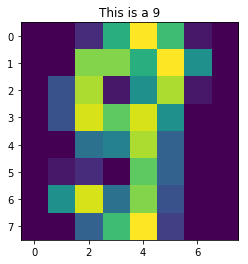

In [325]:
digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.30, random_state=1)

# Code to check the first image in the traing set
img1 = Xtrain[0].reshape(8,8) 
plt.imshow(img1)
plt.title("This is a %d" % ytrain[0])
plt.show()

In [326]:
# using the default rbf kernel looking for optimal C parameter

#creating lists to capture errors
train_error_list = []
val_error_list = []
index_list = []
approx_error_list = []
#ommitting 1 to make plot more readable
gamma_list = [10**-7,10**-6, 10**-5,10**-4,10**-3,10**-2,10**-1,1]

#iterating over different values for C
for i in gamma_list:
    rbf_SVC = SVC(gamma = i)
    rbf_SVC.fit(Xtrain, ytrain)
    train_error = 1.0-rbf_SVC.score(Xtrain,ytrain)
    val_error = 1.0-rbf_SVC.score(Xtest,ytest)
    train_error_list.append(train_error)
    val_error_list.append(val_error)
    approx_error_list.append(val_error - train_error)
    index_list.append(i)

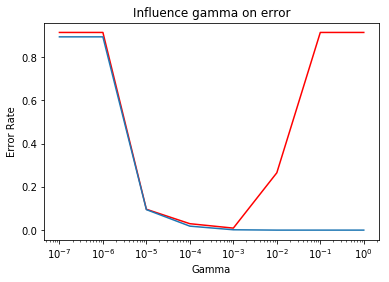

In [327]:
#plotting the two errors in relation to n_estimators. 
# test error: red 
# train error: blue

plt.plot(index_list, val_error_list,"r", index_list, train_error_list)
plt.title('Influence gamma on error')

plt.xlabel('Gamma')
plt.ylabel('Error Rate')
plt.xscale('log')

In [328]:
#summarizing numerical results 
columns = {'gamma': gamma_list,'train error':train_error_list, 'validation error': val_error_list, 'approximation error': approx_error_list}
error_df = pd.DataFrame(columns)
cols = error_df.columns.tolist()
cols = cols[:-1] + cols[-1:] 
print (error_df[cols])

   approximation error         gamma  train error  validation error
0             0.020362  1.000000e-07     0.892601          0.912963
1             0.020362  1.000000e-06     0.892601          0.912963
2             0.001626  1.000000e-05     0.094670          0.096296
3             0.011332  1.000000e-04     0.018298          0.029630
4             0.007668  1.000000e-03     0.001591          0.009259
5             0.264815  1.000000e-02     0.000000          0.264815
6             0.912963  1.000000e-01     0.000000          0.912963
7             0.912963  1.000000e+00     0.000000          0.912963


#### Answer

1. Large `gamma` values yield the lowest training error although the training error already reaches 0 `gamma` at greater than 0.01. This is not surprising since we expect models with large `gamma` values to have high variance and low bias (overfit).

2. `gamma` of 0.001 yields the lowest validation error. Validation error: 0.009259

3. In general this method is a good way of estimatign the value for `gamma` since it can be considered our "best guess" at the ideal value for `gamma`. In the above example, the validation error can be used as an estimate for the performance of our model on unknown test data. However, based on the split of our data into training and test data, all models are trained on the same part of the data (Xtrain) and evaluated on the same data (Ytest). This intoduces a risk of attaining low validation-error simply by chance, known as optimization bias.

4. The above table shows that the difference between test and validation error is the lowest for a `gamma` value of 0.001 and increases for larger `gamma` values. This means, the ability of the training error to approximate validation error decreases

5. In general, large values of `gamma` indicate a large influence of training observations close to the hyperplane - this indicates a high variance and low bias (potential overfitting). Low values of `gamma` indicate that even training observations far away from the hyperplane have an influence on the classification - this indicates low variance and high bias (potential underfitting). 

### Exercise 2b: built-in CV methods
rubric={reasoning:3,code:3}

The exercise we did above is a pretty common one: try a bunch of different hyperparameter values and pick the lowest validation (or cross-validation) error. This operation is so common, in fact, that scikit-learn has some built in functions to do it for you. We will focus on [`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). As the name implies, this class performs a grid search in parameter space. Your tasks:

1. Once again find the best `gamma` for the digits task, but this time using `GridSearchCV` with default parameters (this will do 3-fold cross-validation by default). Do you get the same result as above? Note: after running `fit` on the `GridSearchCV` object, you can access the results with `cv.best_params_` and `cv.best_score_` if `cv` is your `GridSearchCV` object.
2. Now that this is all set up, it should be easy to optimize other parameters as well. Expand your search to cover the `C` parameter in addition to `gamma`. Can you get a lower cross-validation error than searching over `gamma` only?
3. In the previous part, are you sure your conclusion is valid? For example, is there randomness in your experiments? What parts of your experiment pipeline are random? How might you mitigate this randomness in order to draw sound conclusions?
4. When searching over both `C` and `gamma`, did you get the same best `gamma` value that you got when optimizing `gamma` only? Do you expect this behavior in general?
5. In addition to `GridSearchCV` there are other approaches like `RandomizedSearchCV`, which, as its name implies, tries random hyperparameter configurations instead of performing an exhaustive grid search. Name a situation in which random search would be strongly preferable over a grid search, and briefly explain why.

#### Answer

In [329]:
#1
parameters = {"gamma" : [10**-7,10**-6, 10**-5,10**-4,10**-3,10**-2,10**-1]}
svc = SVC()
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(Xtrain,ytrain)


print("Like in the above approach, the ideal gamma using `grid_search` is: ", grid_search.best_params_, "and the best score is: ", grid_search.best_score_)

Like in the above approach, the ideal gamma using `grid_search` is:  {'gamma': 0.001} and the best score is:  0.986475735879


In [330]:
#2
parameters = {"gamma" : [10**-7,10**-6, 10**-5,10**-4,10**-3,10**-2,10**-1], "C" : list(range(1,100,1)) }
svc = SVC()
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(Xtrain,ytrain)

print("Using GridSearchCV, the optimal parameters are: ",grid_search.best_params_,"and the best score is: ",grid_search.best_score_)

Using GridSearchCV, the optimal parameters are:  {'C': 2, 'gamma': 0.001} and the best score is:  0.988066825776


3.Randomness introduced by split of trainig data in training and validation set. ADD MORE EXPLANATION 


4.The above Results indicate that the gamma-paramater remains the same across the two methods. Further, we observe that we are able to slightly increase the model's score when looking for an optimal combination of the parameters `C` and `gamma`. In general, I expect that the optimal `gamma` found in the above approaches is a local optimum, that is  equal between the two approaches. I would not be surprised to find another minimum with a different combination of parameters.


5.Performing and exhaustive grid-search increases the **risk of optimization bias.** Since the algorithm fits and validates many models across an exhaustive range of hyperparameters, the risk of achieving a low validation score simply by chance increases with every additional model we fit. Further, exhaustive grid-search can get **computationally expensive.** Therefore, if we are for example searching for an optimal combination of multiple hyperparameters that can all vary across a large number of values, it can be preferrable to use a randomized search of hyperparamters to save computational capacity and time and reduce the risk of optimization bias. 

## (optional) Exercise 3: more sophisticated hyperparameter tuning. 
rubric={reasoning:1} 

There are all sorts of software packages that make hyperparameter tuning with scikit-learn even more automated.  For example:

- [hyperopt-sklearn](https://github.com/hyperopt/hyperopt-sklearn)
- [auto-sklearn](https://github.com/automl/auto-sklearn)
- [SigOptSearchCV](https://sigopt.com/docs/overview/scikit_learn)

Give one of these a try and report your thoughts. Or, if you're even more adventurous, you could try a package that isn't tied to scikit-learn. There are many options for you to play around with in your ample free time:

- [TPOT](https://github.com/rhiever/tpot)
- [hyperopt](https://github.com/hyperopt/hyperopt)
- [hyperband](https://github.com/zygmuntz/hyperband)
- [SMAC](http://www.cs.ubc.ca/labs/beta/Projects/SMAC/)
- [MOE](https://github.com/Yelp/MOE)
- [pybo](https://github.com/mwhoffman/pybo)
- [spearmint](https://github.com/HIPS/Spearmint)
- [BayesOpt](https://github.com/rmcantin/bayesopt)

Note: this list is biased towards the type of optimizers I (Mike) know best, which is a technique called Bayesian optimization. This list isn't meant to be exhaustive. 

In other news, the recently announced [Amazon SageMaker](https://aws.amazon.com/sagemaker/) is also supposed to do hyperparameter optimization for you (among many other things it does).

## Exercise 4: cross-validation
rubric={reasoning:3,code:3}

Using sklearn's `DecisionTreeClassifier` on the 10-feature dataset [`carseats.csv`](../../data/carseats.csv), compute the 10-fold cross-validation scores on the training data alone using sklearn's [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Report the cross-validation error for all depths (averaging over the error for the two folds). Write a couple sentences interpreting your results and recommending a good depth to use. 

A few notes on the dataset:
- $Y$ is `HighSales`
- `HighSales == 'Yes'` when unit sales (in thousands) > 8
- the [`carseats.csv`](data/carseats.csv) was derived from the ISLR R package, more detail can be found about this dataset on page 4 of the [ISLR package documentation](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf)

Then, when you are done, compare cross-validation to regular validation (splitting your training set into two parts -- you can choose the split percentages). Run some experiments to assess whether you are getting benefits from doing cross-validation as opposed to regular validation. You'll need to think of what experiments might make this clear.

In [2]:
carseats = pd.read_csv("https://raw.github.ubc.ca/ubc-mds-2017/DSCI_573_feat-model-select_students/master/data/carseats.csv?token=AAADk4YfliMoVcpa3HDJui6iYSdTPFgfks5aXnyCwA%3D%3D")
#tree_model = DecisionTreeClassifier()

#changing character-features to numerical features
carseats["HighSales"] = pd.Series(np.where(carseats.iloc[:,10].values == "Yes",1,0), carseats.index)
carseats["US"] = pd.Series(np.where(carseats.iloc[:,9].values == "Yes",1,0), carseats.index)
carseats["Urban"] = pd.Series(np.where(carseats.iloc[:,8].values == "Yes",1,0), carseats.index)
carseats["ShelveLoc"] = pd.Series(np.where(carseats.iloc[:,5].values == "Good",2,carseats.iloc[:,5].values), carseats.index)
carseats["ShelveLoc"] = pd.Series(np.where(carseats.iloc[:,5].values == "Medium",1,carseats.iloc[:,5].values), carseats.index)
carseats["ShelveLoc"] = pd.Series(np.where(carseats.iloc[:,5].values == "Bad",0,carseats.iloc[:,5].values), carseats.index)


#removing labels from training dataset
X_train = carseats.iloc[:,0:10]
y_train = carseats.iloc[:,10]


avg_cv_error_list = []
index_list = []

for i in range(1,50):
    #initiating tree model 
    tree_model = DecisionTreeClassifier(max_depth = i)
    cross_val_score(tree_model, X_train, y_train, cv = 10)
    #calculating 10-fold cross-validation error 
    avg_cv_error = 1- np.mean(cross_val_score(tree_model, X_train, y_train, cv = 10))
    avg_cv_error_list.append(avg_cv_error)
    index_list.append(i)
    

In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.30, random_state=1)

val_error_list =[]

for i in range(1,50):
    #initiating tree model 
    tree_model = DecisionTreeClassifier(max_depth = i)
    tree_model.fit(Xtrain, ytrain)
    val_error = 1- tree_model.score(Xtest, ytest)
    val_error_list.append(val_error)
    
    

In [10]:
columns = {'average cv error': avg_cv_error_list,'validation error':val_error_list}
error_df = pd.DataFrame(columns)
error_df.head(n=5)

,average cv error,validation error
0,0.292638,0.291667
1,0.279820,0.266667
2,0.297894,0.258333
3,0.253058,0.283333
4,0.305962,0.216667


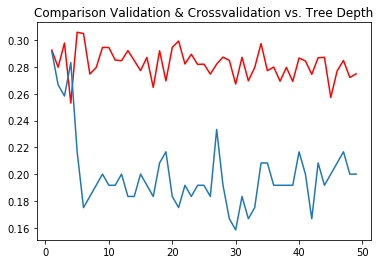

In [6]:
plt.plot(index_list, avg_cv_error_list,"r", index_list, val_error_list)
plt.title('Comparison Validation & Crossvalidation vs. Tree Depth')

In the above plot, we observe that - across differnt tree depths - the average cross-validation error is cosistently higher and less variable than the validation error generated by a single split. Intuitively, the lower variation of the cross-validation error can easily be explained by the fact that we are reporting an average validation error across the 10 folds. Further, the above plot indicates, that the cross-validation error is likely a better estimate for the true test error by reducing the randomness introduced by the split of the data.

## Exercise 5a: picking the number polynomial features
rubric={reasoning:2,code:2}

The following code loads a 1-D data set and fits a linear model to  it.


array([[  3.29914141e+00],
       [ -2.09537508e+00],
       [ -9.74456079e-01],
       [  3.62057298e+00],
       [  1.14739550e+00],
       [  4.91187788e+00],
       [ -2.96301125e+00],
       [  3.27209085e+00],
       [  1.75861619e+00],
       [ -2.51050530e+00],
       [ -2.42143734e-01],
       [ -1.00924773e+00],
       [  9.94382491e-01],
       [  3.00522766e+00],
       [ -3.94931229e+00],
       [  3.21442194e+00],
       [  3.41086330e+00],
       [ -1.45493756e+00],
       [ -6.99305374e-01],
       [  7.22392184e-01],
       [  2.00824731e+00],
       [  2.42469757e+00],
       [  2.57884151e+00],
       [ -1.10871236e+00],
       [ -7.06975150e-01],
       [  4.56344658e+00],
       [  7.29713673e-01],
       [  3.49722054e+00],
       [ -2.23654684e+00],
       [  1.22323615e+00],
       [  8.83616846e-01],
       [  4.63468466e+00],
       [ -4.14097305e+00],
       [  4.98891604e-03],
       [  2.15896765e-01],
       [ -4.09833998e+00],
       [  4.04666480e+00],
 

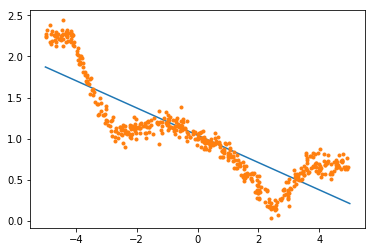

In [2]:
data = pd.read_pickle("data/basisData.pkl")
X = data['X']
y = data['y']

lm = LinearRegression()
lm.fit(X, y) 

grid = np.linspace(-5,5,1000)[:,None]
grid_pred = lm.predict(grid)
plt.plot(grid, grid_pred)
plt.plot(X, y, '.')
plt.show()

The linear model is problematic because the target is a non-linear function of the input.  We can do better than linear regression by using _polynomial features_. We can think of transforming our data into the following matrix $X_{poly}$ where each of its rows contains the values $(X_{i})^j$ for $j=0$ up to some maximum $degree$. E.g., 

$$
X_{poly} = \left[\begin{array}{cccc}
1 & x_1 & (x_1)^2 & (x_1)^3\\
1 & x_2 & (x_2)^2 & (x_2)^3\\
\vdots\\
1 & x_n & (x_n)^2 & (x_N)^3\\
\end{array}
\right],
$$

We can then fit a least squares model as if the above was our original data set. You can think of this as "changing the model by changing the data" since we are still using `LinearRegression` but making the fit nonlinear by inventing new features. 

The code below uses polynomial features of degree 3 plots the results.

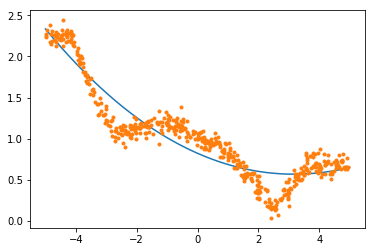

In [3]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
Xpoly = pf.fit_transform(X)
lm.fit(Xpoly, y)

grid_poly = pf.fit_transform(grid)
grid_poly_pred = lm.predict(grid_poly)
plt.plot(grid, grid_poly_pred)
plt.plot(X, y, '.')
plt.show()

Your task: Using 10-fold cross validation (again, sklearn's implementation is fine), report the cross-validation score for models with degrees 0 through 40. (You can use any reasonable performance score, like squared error or the built-in `score` function of the `LinearRegression` object, which computes the $R^2$ score; see [here](http://scikit-learn.org/stable/modules/model_evaluation.html) for more info.) How does the degree of the polynomial affect the fundamental trade-off in machine learning? Write a couple sentences interpreting your results.

In [20]:
cv_err_pol = []
index_list = []

for i in range(1,40):
    pf = PolynomialFeatures(degree=i)
    Xpoly = pf.fit_transform(X)
    avg_cv_error_pol = 1- np.mean(cross_val_score(lm, Xpoly, y, cv = 10))
    cv_err_pol.append(avg_cv_error_pol)
    index_list.append(i)
    
print("The polynomial transformation with the smallest cross-validataion error is: ", np.argmin(cv_err_pol)+1)
print("The cv-error for this transformation is ", cv_err_pol[np.argmin(cv_err_pol)])

The polynomial transformation with the smallest cross-validataion error is:  15
The cv-error for this transformation is  0.0187587041132


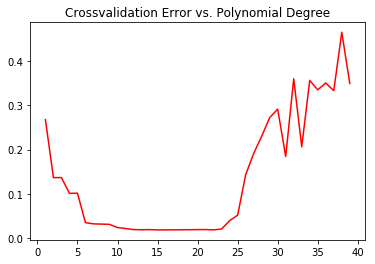

In [41]:
plt.plot(index_list, cv_err_pol,"r")
plt.title('Crossvalidation Error vs. Polynomial Degree')

**Interpretation**

The above plot indicates that, in this case, the cross-validation error decreases with increasing polynomial degree from 0 to 10 as we are decreasing the models bias and increasing its variance. The reduction in cv-error idicates that the linear model is now able to capture more of the variability in the data. Increasing the polynomial degree beyond 10 does not yield any significant improvement in cross-validation error. Finally, increasing the degree beyond 25 leads to a dramatic increase in cv-error indicating that our model is now modeling noise in the training portion of the data reducing its predictive qualities on the validation portion (high variance, low bias: overfitting) 

## Exercise 5b: automation with Pipelines
rubric={reasoning:2,code:2}

Let's say we want to use `GridSearchCV` here, as we did earlier on in the lab. However, there's a problem: the hyperparameter we're changing isn't a parameter of the `LinearRegression` object. We might try to do something like:

```
pf = PolynomialFeatures(degree=degree)
Xpoly = pf.fit_transform(X)

GridSearchCV(lm, parameters=???)
```

Make sure you understand the problem before proceeding. Write a sentence or two in your own words explaining why we can't just use `GridSearchCV` here like we did above.



**Answer** 

*We can not use the GridSearchCV function in the same way we did above because the function will attempt to pass the parameters to the lm function. However, in this case we are not iterating over different hyperparameters for a model - we are incrementally increasing the parameter that transforms the features that we pass into the model. We are changing the data, not the hyperparameters*

To address the problem, we'll use scikit-learn's [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). The idea is to string together the feature transformation and the regression into a single pipeline. We can then pass that whole pipeline object into `GridSearchCV` and specify whatever hyperparameters we want to optimize. In fact, we can even specify a combination of parameters from different steps of the pipeline (e.g. the degree of the polynomial and a parameter of the linear regression).

Your task: use a `Pipeline` with `GridSearchCV` to automatically find the best polynomial degree. Compare your answer to what you got above in 5a.  

PS: another use of Pipelines is when you do a lot of preprocessing to the data, like subtracting the mean value or other transformations. It's critical that one does the same test of transformations to the test data as the training data. A Pipeline is a good way of keeping track of all the transformations you did. Then when you run the Pipeline on the test example, all the same procedures are followed. There are some nice Pipeline examples in the scikit-learn documentation, like [here](http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html) an [here](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html); we haven't yet covered all the methods in those examples, but we will cover all of it before the end of the program.

In [22]:
from sklearn.pipeline import Pipeline

degrees = range(40)
pf = PolynomialFeatures()
Xpoly = pf.fit_transform(X)
lm = LinearRegression()

pipe = Pipeline(steps = [('pf', pf), ('lm', lm)])


pipe_cv = GridSearchCV(estimator = pipe, 
                      param_grid = {'pf__degree':degrees})

pipe_cv.fit(X,y)

pipe_cv.best_params_
pipe_cv.best_score_
print("The best value for Degree for transformation is: ", pipe_cv.best_params_)
print("The cv-error is: ", 1-pipe_cv.best_score_)

The best value for Degree for transformation is:  {'pf__degree': 22}
The cv-error is:  0.0180026217741


* Observation  

Using GridSearch across 50 degrees leads to a different optimal feature transformation. The GridSearch suggests a degree of 22 while the above approach suggests a polynomial of 15. the cv-error is very similar - but slightly lower for GridSearch

## Exercise 6a: linear regression in Python using `sklearn` and `statsmodels` vs R
rubric={reasoning:3,code:3}

For this exercise, you will perform a linear regression on the [cars dataset](../../data/cars.csv) in Python and R. You will use `dist` as your response variable/target, and `speed` as the explanatory variable/predictor. You can find a description of the dataset [here](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/cars.html). For each, you will also split the dataset into a training and test set and assess the training and validation loss.

The aim is to become familar with the inputs and outputs of the various functions to perform linear regression in Python and R, as well as recognize the strengths and limitations of each of the functions and their appropriate uses cases.

Perform the regression with the following set of tools:

1. Python: scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. Python: statsmodels [`sm.OLS`](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html)
3. R: `lm` (*note: for this part of the exercise, either use `rpy2` to embed your R code in this notebook, or link to your rendered R code in another file, e.g., rendered `.Rmd` or Jupyter notebook running an R kernel*)

Comment on the inputs and output of the 3 linear regression functions. In R, you can get all sorts of good stuff from the output of `lm`. What / how much of that can you get from `sklearn`'s `LinearRegression`? From `statsmodels`'s `sm.OLS`? Describe a case when you might use each of these functions.

#### Answer

In [331]:
#1.scikit-learn's LinearRegression

#reading in data 
cars = pd.read_csv("https://raw.github.ubc.ca/ubc-mds-2017/DSCI_573_feat-model-select_students/master/data/cars.csv?token=AAADk5_vMO99Cj8fxIhmbSAWwvmCj-jAks5aXsP7wA%3D%3D")

#splitting data into train in validation parts
Xtrain, Xtest, ytrain, ytest = train_test_split(cars["speed"], cars["dist"], test_size=0.30, random_state=1)

lm = LinearRegression(fit_intercept = True)
lm.fit(Xtrain[:, None],ytrain)

train_score = lm.score(Xtrain[:, None], ytrain)
validation_score = lm.score(Xtest[:,None],ytest)

print("The training R-squared of scikit-learn's LinearRegression is ", round(train_score,5), " the validation R-squared validation score is ", round(validation_score,5))


The training R-squared of scikit-learn's LinearRegression is  0.69156  the validation R-squared validation score is  0.55483


In [332]:
#extracting information on coefficients and fit from model 
from sklearn.metrics import mean_squared_error, r2_score

#coefficients
coef = lm.coef_
intercept = lm.intercept_

print("The slopw coefficient is ", round(coef[0],5), "the intercept is ", lm.intercept_)

#r-squared 
y_pred = lm.predict(Xtest[:, None])
r_squared = r2_score(ytest, y_pred)

print("The r-squared value is ", round(r_squared,5))
                     
sample_pred = lm.predict(15)

print("The predicted response for an x-value of 5 is", round(sample_pred[0], 5))

The coefficient is  3.91046 the intercept is  -16.3733641494
The r-squared value is  0.55483
The predicted response for an x-value of 5 is 42.28359


**Comments:**   

After fitting the model on the trainign data,it is very easy to make predictions using the predict funtion of `predict()` scikit-learn's LinearRegression package. Extracting information on coefficients and goodness of fit of the model is fairly complicated and requires additional functions. Further, I could not find a way to simply print out a model summary or to access the residuals for model diagnostics. Although these functions may be available, **I would likely only use scikit-learn's LinearRegression if I wanted to fit a model solely for the purpose of making predictions.**


In [93]:
#2. statsmodels sm.OLS
import statsmodels.api as sm

Xtrain = Xtrain

lm_ols = sm.OLS(ytrain,sm.add_constant(Xtrain))
ols_results = lm_ols.fit()

ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     73.99
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           6.10e-10
Time:                        21:15:18   Log-Likelihood:                -141.06
No. Observations:                  35   AIC:                             286.1
Df Residuals:                      33   BIC:                             289.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3734      7.072     -2.315      0.027     -30.762      -1.984
speed          3.9105      0.455      8.602      0.000       2.986       4.835
==============================================================================
Omnibus:                        7.883   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.427
Skew:                           0.902   Prob(JB):                       0.0402
Kurtosis:                       4.073   Cond. No.                         46.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
ols_results.rsquared_adj

0.68221813466485015

**Comments:**

To attain comparable results to the scikit-learn's linear model and to match our theoretical knowledge of linear models with intercept, we had to **explicitly add an intercept** to the above model. After doing so, `statsmodels sm.OLS` allows us to view a summary of the regression results in a table using the `.summary` function. **We observe, that all parameters and values (including training R-squared) are equivalent to the previous model.**

In addition to the confusion about the explicitly added intercept, I could again not find any way to extract the residuals from the model for the purpose of model diagnostics. Therefore, I would use `statsmodels sm.OLS` if I wanted to fit an interpretable linear model to analyze the relationship between explanatory and response variabels in Python. 

In [2]:
#3.lm() function in R   


#Call:
#lm(formula = car_train$dist ~ car_train$speed)

#Residuals:
#    Min      1Q  Median      3Q     Max 
#-21.508  -8.461  -1.479   3.456  42.521 

#Coefficients:
#                Estimate Std. Error t value Pr(>|t|)    
#(Intercept)     -18.6051     7.4567  -2.495   0.0175 *  
#car_train$speed   4.0060     0.4641   8.632 3.43e-10 ***
#---
#Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
#
#Residual standard error: 13.64 on 35 degrees of freedom
#Multiple R-squared:  0.6804,	Adjusted R-squared:  0.6713 
#F-statistic: 74.52 on 1 and 35 DF,  p-value: 3.43e-10



#### Comments:

The `lm()` function in R conveniently displays all information on the parameters and their significance as well as the goodness of fit (R-squared) of the model and the distribution of the residuals. To access all sorts of values from the model such as coefficients, predictions and residuals I can use the `$` notation. For example, I can access the the predictions made by the model using `cars_lm$fitted.values`. A major downside of using R was that I could not find a function to split my data into train and test set - for the same reason the above the coefficients and model diagnostics are slightly different in the above R output (I did not have the time to implement this manually).

Since I am lot more experience using the the `lm()` function in R as opposed to the previous methods, I would use this function over `statsmodels sm.OLS` if I needed to create an easily interpretable model for the purpose of analyzing the relationshipt between explanatory and response variable.  

You can find my R code in this [R markdown document](exercise_6.Rmd). 

*Note:* Coefficients and model statistics are slightly different because I fit this regression model based on another train/test split as the previous ones - split generated in Rmd document. 

## (optional) 6b: comparing tools with logistic regression

rubric={reasoning:1}

Repeat exercise 6a, but this time for logistic regression rather than linear regression. We'll use a [dataset about getting into grad school](http://www.ats.ucla.edu/stat/data/binary.csv) with `admit` as the response variable/target and the remaining 3 features as the explanatory variables/predictors. 

Perform the logistic regression with the following set of tools:

1. Python: scikit-learn's [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (*note: set `C=1e6`; this disables regularization and will be explained later in the course*) 
2. Python: statsmodels [`sm.Logit`](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html)
3. R: `glm` (*note: for this part of the exercise, either use `rpy2` to embed your R code in this notebook, or link to your rendered R code in another file, e.g., rendered `.Rmd` or Jupyter notebook running an R kernel*)

Comment on the inputs and output of the 3 logistic regression functions. Describe a case when you might use each of these functions.

## Exercise 7: Feature selection
rubric={reasoning:4}

In the `primeData` dataset, most of the variables are not relevant to the prediction. In particular, only the variables $j$, where $j$ is a prime number, are relevant.

The code below loads the data, fits a linear regression model, and computes the squared error on the training and validation sets. As you can see, the validation error is huge compared to the (tiny) training error. This model is clearly over-fitting.

In [4]:
data = pd.read_pickle("data/primeData.pkl")    
    
Xtrain = data['X']
ytrain = data['y']
Xvalidate = data['Xvalidate']
yvalidate = data['yvalidate']
    
n = Xtrain.shape[0]
d = Xtrain.shape[1]
t = Xvalidate.shape[0]

print("Number of training examples:", n)
print("Number of features:", d)
print()

def fit_and_report(model, X, y, Xv, yv):
    model.fit(X,y)
    mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)
    errors = [mean_squared_err(y, model.predict(X)), mean_squared_err(yv, model.predict(Xv))]
    return errors
    
errs = fit_and_report(LinearRegression(), Xtrain, ytrain, Xvalidate, yvalidate)

print("Training error:   %.3g" % errs[0])
print("Validation error: %.3g" % errs[1])

Number of training examples: 250
Number of features: 300

Training error:   5.48e-28
Validation error: 27.4


The code below performs feature selection using scikit-learn's implementation of backward stepwise selection called [`RFE`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). As you can see, the model overfits much less. 

In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge # we'll talk about this in the second part of the course; don't worry for now

rfe = RFE(estimator = Ridge(), n_features_to_select = 100)
rfe.fit(Xtrain, ytrain)
Xtrain_sel = Xtrain[:, rfe.support_]
Xvalidate_sel = Xvalidate[:, rfe.support_]

errs = fit_and_report(LinearRegression(), Xtrain_sel, ytrain, Xvalidate_sel, yvalidate)

print("Training error:   %.3g" % errs[0])
print("Validation error: %.3g" % errs[1])

Training error:   0.595
Validation error: 9.02


Plot the validation loss for different values of the number of features ($k$) for RFE. Discuss what you notice.
Also plot one other model quality metric (*e.g.,* Cp, AIC, BIC, or adjusted $R^2$) vs. $k$ and discuss. 

#### Answer

**Note**: In the below loop, I calculated the adjusted r-squared using the following formula: 

$$ 1 - \frac{(1-R^2)(N-1)}{N-p-1}$$

In [291]:
#plotting validation loss and adjusted R-squared 
val_error_list = []
adj_r_squared_list = []
r_squared_list = []
index_list = []

for i in range(1,300,10):
    rfe = RFE(estimator = Ridge(), n_features_to_select = i)
    rfe.fit(Xtrain, ytrain)
    Xtrain_sel = Xtrain[:, rfe.support_]
    Xvalidate_sel = Xvalidate[:, rfe.support_]
    
    #calculating ajdusted r-squared
    lm_for_r2 = LinearRegression().fit(Xtrain_sel, ytrain)
    r_squared = lm_for_r2.score(Xtrain_sel, ytrain)
    adj_r_squared = 1-(1-r_squared**2)*(n-1)/(n-i-1)
    
    #calculating training and validation error
    errs = fit_and_report(LinearRegression(), Xtrain_sel, ytrain, Xvalidate_sel, yvalidate)
    val_error = errs[1]
    
    
    val_error_list.append(val_error)
    index_list.append(i)
    adj_r_squared_list.append(adj_r_squared)
    r_squared_list.append(r_squared)


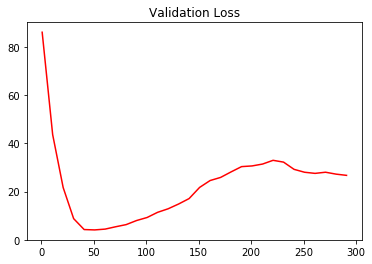

In [106]:
plt.plot(index_list, val_error_list,"r")
plt.title('Validation Loss')

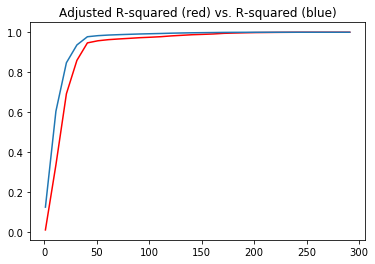

In [108]:
plt.plot(index_list, adj_r_squared_list,"r", index_list, r_squared_list)
plt.title('Adjusted R-squared (red) vs. R-squared (blue)')

**Observation** 

As the number of features remaining in the model increases from 0 to 50, we can see that the validation error decreases significantly indicating better predictive qualities of our model on the validation data. Within the same range of $k$ ,the adjusted r-squared (red) and r-squared (blue) in the second plot indicates that every new feature included increases the proportion of explained error in our model significantly. 

When increasing the features included beyond 50, the validation error increases significantly indicating overfitting and reduced predictive qualities. The second plot supports this observation showing a almost no improvement of R-squared adn adjusted R-squared. 

Looking at the second plot, further shows that the adjusted R-squared value will always suggest that a larger model (with more features) explains more variation in the data than a smaller model. Although the adjusted R-value adds a penalty for high numbers of features, both measures suggest that larger, potentially overfitting models, are superior.

## Exercise 8: forward selection implementation
rubric={reasoning:2,code:8}

Implement the forward selection algorithm. This algorithm works iteratively. At each step, add in the feature that most reduces the validation error. Stop adding features once the valiation error stops decreasing. 

Try out your method on the data set from exercise 7, plus one other data set of your choosing, and discuss the results. What is the time complexity of your method, assuming you have $n$ training example, $D$ features in total, and you want to keep only $d$ features?

You are welcome to hard-code in a particular choice of model, like LinearRegression. Optionally, abstract away the model so that your forward selection function can be called with any model so long as it implements `fit` and `predict` and `score` like most sklearn models.

In [67]:
#aktuelle version

Xtrain = data['X']
ytrain = data['y']
Xvalidate = data['Xvalidate']
yvalidate = data['yvalidate']
    
n = Xtrain.shape[0]
d = Xtrain.shape[1]
t = Xvalidate.shape[0]


val_err_model = []
model_features = []
no_improvement = False


while no_improvement == False:
    #skipping over indices that are already included in model_features
    for i in range(1,Xtrain.shape[1]):
        if i in model_features:
            continue
            
        #iterating over features to add to model 
        model_features.append(i)
        
        #fitting model on selected features 
        Xtrain_sel = Xtrain[:,model_features]
        Xvalidate_sel = Xvalidate[:,model_features]
        lm = LinearRegression().fit(Xtrain_sel, ytrain)
        
        #calculating and recording validation error for all new models
        val_err = 1-lm.score(Xvalidate_sel, yvalidate)
        val_err_feat.append(val_err)
        model_features = model_features[:-1]   

    #finding min validation error
    best_feat_ind = np.argmin(val_err_feat)
    model_features.append(best_feat_ind)
    val_err_feat = []
    
    #keeping track of model validation error to know when to stop
    Xtrain_sel = Xtrain[:,model_features]
    Xvalidate_sel = Xvalidate[:,model_features]
    lm_current = LinearRegression().fit(Xtrain_sel,ytrain)
    val_err_model_current = 1-lm_current.score(Xvalidate_sel,yvalidate)
    val_err_model.append(val_err_model_current)
    
                                                                                          
    if len(val_err_model)>1:
        if val_err_model[-1]>val_err_model[-2]:
            no_improvement = True

In [70]:
print("Using the above algorithm with a hard stopping rule leads to only two features in the model:", model_features)

Using the above algorithm with a hard stopping rule leads to only two features in the model: [274, 273]


**Note** 

The above result seems unrealistic and does not match the ideal feature number in the previous backward selection at all. I assume that I made an error in the algorithm - I could not find it. 

**Complexity**

Although the above algorithm yields wrong results, a forward selection algorithm will likely follow a similar pattern and therefore have the same time complexity: 

$O(d^2)$   

since, in the worst case, we will have to loop over all $d$ features $d$ times (if all features improve the validation error of the model $O(d^2)$). Note: this is ignoring the complexity of fitting a linear model which is $O(c^2n)$ according to this [link](https://math.stackexchange.com/questions/84495/computational-complexity-of-least-square-regression-operation) and the complexity of calculating the validation error for each model which is $O(n)$

## (optional) Exercise 9: Overfitting on the validation set
rubric={reasoning:1}

In this exercise we'll explore the phenomenon knows as overfitting on the validation set. The idea is that if you use the validation set too many times, say when trying out different hyperparameter values, you may end up getting good performance "by chance" sometimes, and therefore pick a poor model (this is sort of like the multiple testing problem in statistics). A couple ways to avoid this pitfall are:

1. Don't use the validation set many times
2. Use a larger validation set and/or cross-validation

Both of these are hard to achieve. We want to use the validation set a bunch of times to pick good hyperparameters, so (1) is tricky. And (2) is also unfortunate, because the more data we use for validation, the less we use for training, and a model trained on a tiny training set may not be representative of a model trained on more data. Cross-validation helps somewhat but it has a different problem: it's slow. For example, if each round of training takes one minute (which is easily possible even for a modestly sized data set), and we want to try out 100 hyperparameter values, the whole thing takes 100 minutes... not great, but not terrible. But now if we decide to do 10-fold cross validation, suddenly we're looking at 1000 minutes, which is pretty much a whole day. And if training takes 10 minutes, now we're looking at the difference between a day and a week. That's a big difference!

In this exercise, you are given some code below that attempts to demonstrate overfitting on the validation set, which uses a [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) on the [boston house prices dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) built in to sklearn. We use a very tiny validation set to emphasize this problem. Another way of emphasizing it would be to try out even more hyperparameter configurations, but this would take a very long time and isn't appropriate for a lab. It does happen in the wild though: people sometimes spend days or weeks trying out different hyperparameter configurations (sometimes manually, sometimes automated).

Note that in the code below we're using 10-fold cross validation as a ground truth score for deciding which model is really better. We could also consider holding out a second validation set for this purpose. This, again, is a difficult issue...

Your tasks: 

- Explain what's happening in the code below. Why are the results worrying? (You may have to run the code a few times in order to get it to behave sub-optimally.) 
- How many times is the tiny validation set being hit by GridSearchCV?
- The size of the validation set is currently set to very few examples. What do you expect would happen if this number is increased or decreaesd? 
- What are the sources of randomness in the experiment below? Are we accounting for them properly? (I went with GridSearchCV instead of RandomizedSearchCV to help with this a little bit.)
- Brainstorm some ways we might go about dealing with these issues. How would you actually approach this problem, for the data set below? Go ahead and try to come up with what you think is the best model. Describe your thought process and the challenges. How badly do you need more data?

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

boston = datasets.load_boston()
X = boston.data
y = boston.target

split = ShuffleSplit(n_splits=1, test_size=2) # very small validation set, no cross-validation (just 1 split)

parameters = {"n_estimators"     : np.arange(2,20,3),
              "max_depth"        : np.arange(2,10,3),
              "min_samples_split": np.arange(2,10,3),
              "min_samples_leaf" : np.arange(1,10,3),
              "max_features"     : np.arange(1,10,3),
              "bootstrap"        : [True, False]}

search = GridSearchCV(RandomForestRegressor(), parameters, cv=split)
search.fit(X, y) # perform the search

print(search.best_params_)
print(search.best_score_)

{'bootstrap': False, 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.989430899037


In [8]:
best_classifier = search.best_estimator_
print("10-fold CV score of best fit:", np.mean(cross_val_score(best_classifier, X, y, cv=10))) 
# above: don't want too many folds since the data set is so small

baseline = RandomForestRegressor() # this should be reasonable but unlikely to be the best possible
print("10-fold CV score of baseline:", np.mean(cross_val_score(baseline, X, y, cv=10)))

10-fold CV score of best fit: 0.185542236941
10-fold CV score of baseline: 0.441831254889
